# Entry into Santa Competition 2018

In [3]:
import sys
'concorde' in sys.modules
 #Checking cwhat modules are available

True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import collections  as mc
import numpy as np
import time
import pylab as pl
from concorde.tsp import TSPSolver

In [8]:
cities = pd.read_csv('cities.csv', header = 0, index_col=0)



In [9]:
cities.info()
cities.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197769 entries, 0 to 197768
Data columns (total 2 columns):
X    197769 non-null float64
Y    197769 non-null float64
dtypes: float64(2)
memory usage: 4.5 MB


,X,Y
CityId,,
0,316.836739,2202.340707
1,4377.405972,336.602082
2,3454.158198,2820.053011
3,4688.099298,2935.898056
4,1010.696952,3236.750989


In [10]:
#Retrieve the x and y values from the data frame
xc = cities['X']
yc = cities['Y']

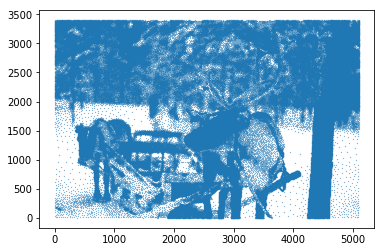

In [11]:
plt.scatter(xc, yc, s=0.05)
plt.show()

###  Run Solver

In [12]:
# Instantiate solver
solver = TSPSolver.from_data(
    cities.X,
    cities.Y,
    norm="EUC_2D"
)

t = time.time()
tour_data = solver.solve(time_bound = 60.0, verbose = True, random_seed = 42) # solve() doesn't seem to respect time_bound for certain values?
print(time.time() - t)
print(tour_data.found_tour)
    

68.98553490638733
True


In [21]:
type(tour_data.tour)

numpy.ndarray

### Create submission

In [13]:
pd.DataFrame({'Path': np.append(tour_data.tour,[0])}).to_csv('submission.csv', index=False)

### Plot tour

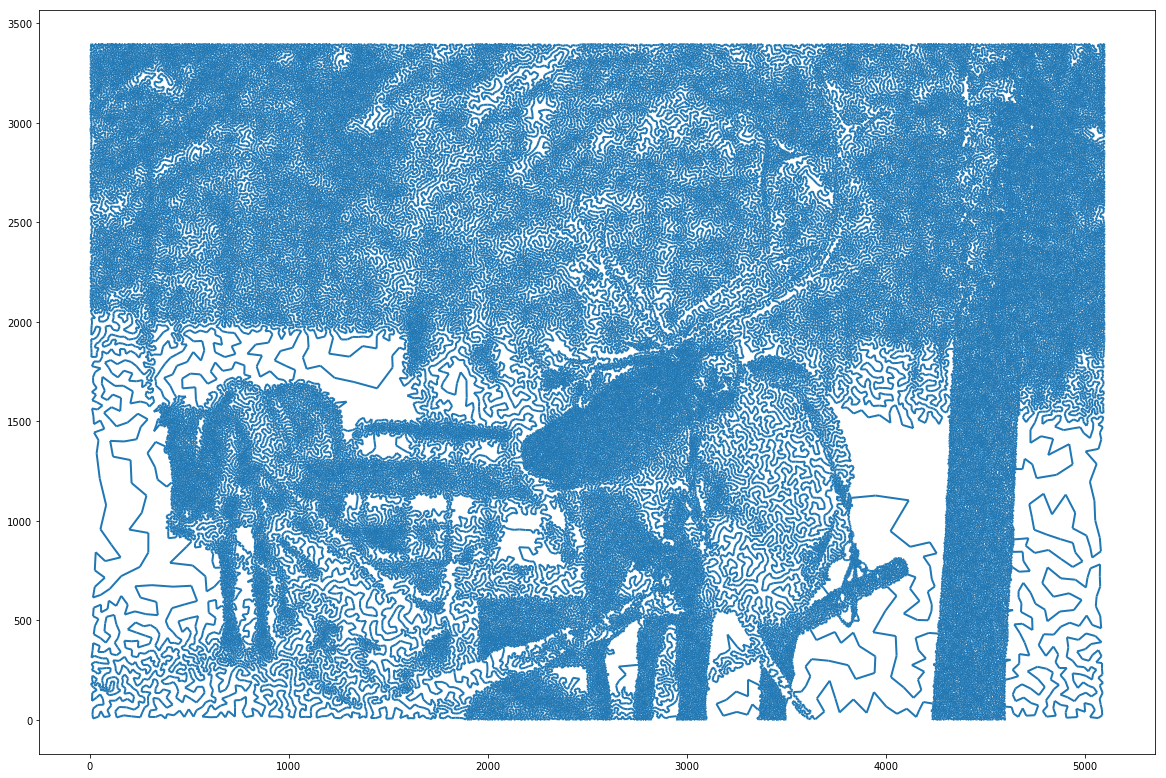

In [14]:
# Plot tour
lines = [[(cities.X[tour_data.tour[i]],cities.Y[tour_data.tour[i]]),(cities.X[tour_data.tour[i+1]],cities.Y[tour_data.tour[i+1]])] for i in range(0,len(cities)-1)]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.add_collection(lc)
ax.autoscale()